# **Coding Assignment**
Ibrahim M. Kabbash - 17100399

In [ ]:
import pandas as pd
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
import numpy as np
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Read csv file
dataset = pd.read_csv('cars_evaluation.csv')
# Display first 5 rows
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2


In [ ]:
# Features (buying, maint, doors, persons, lug_boot, safety)
X = dataset.iloc[:,0:6].values
# Classes (unacc, acc, good, vgood)
Y = dataset.iloc[:,-1].values

print(X.shape)
print(Y.shape)

(1728, 6)
(1728,)


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=42)

---
# **Neural Network**

In [ ]:
# Initializing Neural Network
classifier = Sequential()

# input layer/the first hidden layer
classifier.add(Dense(500, activation='relu', input_shape=(6,)))
# ReLU activation: max(x, 0) to get non-zero values
# Second hidden layer
classifier.add(Dense(400, activation='relu'))
# Third hidden layer
classifier.add(Dense(250, activation='relu'))
# Fourth hidden layer
classifier.add(Dense(100, activation='relu'))
# Output layer
classifier.add(Dense(4, activation='sigmoid'))
# sigmoid(x) = 1 / (1 + exp(-x))

# Compiling the Neural Network
classifier.compile(optimizer=optimizers.Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=5000) # Fitting the Neural Network to the training set

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 27ms/step - loss: 0.7334 - accuracy: 0.7391 - val_loss: 0.8514 - val_accuracy: 0.6789
Epoch 2502/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.7307 - accuracy: 0.7391 - val_loss: 0.8562 - val_accuracy: 0.6789
Epoch 2503/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.7303 - accuracy: 0.7391 - val_loss: 0.8610 - val_accuracy: 0.6789
Epoch 2504/5000
4/4 [==============================] - 0s 23ms/step - loss: 0.7300 - accuracy: 0.7391 - val_loss: 0.8577 - val_accuracy: 0.6789
Epoch 2505/5000
4/4 [==============================] - 0s 24ms/step - loss: 0.7295 - accuracy: 0.7391 - val_loss: 0.8547 - val_accuracy: 0.6789
Epoch 2506/5000
4/4 [==============================] - 0s 27ms/step - loss: 0.7302 - accuracy: 0.7391 - val_loss: 0.8526 - val_accuracy: 0.6789
Epoch 2507/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.7301 - accuracy: 0.7391

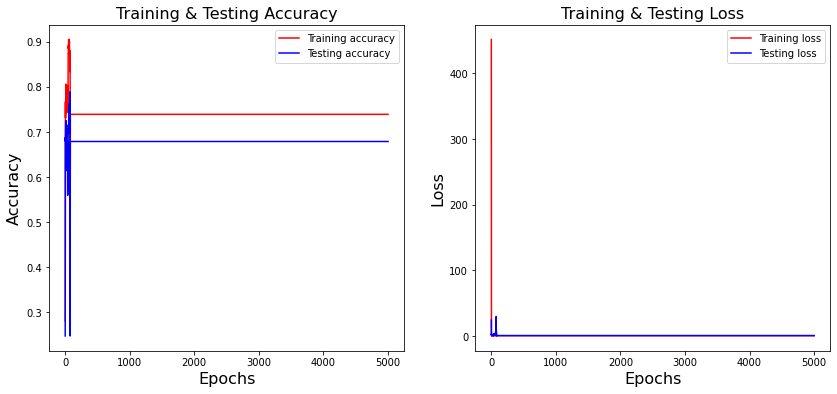

In [ ]:
# Initiating the histogram
history_dict = history.history
loss_values = history_dict['loss'] # take the values of the loss column
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1) # range (1, 5001)
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns/graphs

# Plot the model accuracy vs Epochs
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Testing accuracy')
ax[0].set_title('Training & Testing Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

# Plot the loss vs Epochs
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Testing loss')
ax[1].set_title('Training & Testing Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

---
# **Re-testing with the EarlyStopping**

In [ ]:
# Compiling the Neural Network but with EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=10)
classifier.compile(optimizer=optimizers.Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
# Fitting the Neural Network to the training set
history = classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=5000, callbacks=[early_stopping])

Epoch 1/5000
4/4 [==============================] - 39s 58ms/step - loss: 0.7353 - accuracy: 0.7391 - val_loss: 0.8616 - val_accuracy: 0.6789
Epoch 2/5000
4/4 [==============================] - 0s 16ms/step - loss: 0.7303 - accuracy: 0.7391 - val_loss: 0.8527 - val_accuracy: 0.6789
Epoch 3/5000
4/4 [==============================] - 0s 16ms/step - loss: 0.7317 - accuracy: 0.7391 - val_loss: 0.8555 - val_accuracy: 0.6789
Epoch 4/5000
4/4 [==============================] - 0s 17ms/step - loss: 0.7289 - accuracy: 0.7391 - val_loss: 0.8653 - val_accuracy: 0.6789
Epoch 5/5000
4/4 [==============================] - 0s 16ms/step - loss: 0.7313 - accuracy: 0.7391 - val_loss: 0.8685 - val_accuracy: 0.6789
Epoch 6/5000
4/4 [==============================] - 0s 17ms/step - loss: 0.7300 - accuracy: 0.7391 - val_loss: 0.8641 - val_accuracy: 0.6789
Epoch 7/5000
4/4 [==============================] - 0s 17ms/step - loss: 0.7292 - accuracy: 0.7391 - val_loss: 0.8554 - val_accuracy: 0.6789
Epoch 8/5000

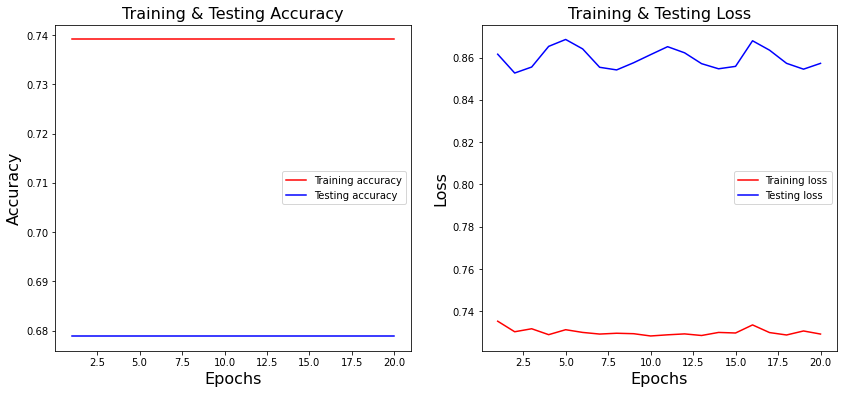

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] #take the values of the loss column
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1) # range (1, 5001)
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns/graphs

# Plot the model accuracy vs Epochs
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Testing accuracy')
ax[0].set_title('Training & Testing Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

# Plot the loss vs Epochs
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Testing loss')
ax[1].set_title('Training & Testing Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()